[*********************100%%**********************]  1 of 1 completed


Epoch 1/500
56/56 [==============================] - 11s 60ms/step - loss: 0.0857 - val_loss: 0.0049
Epoch 2/500
56/56 [==============================] - 2s 30ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 3/500
56/56 [==============================] - 2s 43ms/step - loss: 0.0021 - val_loss: 0.0037
Epoch 4/500
56/56 [==============================] - 2s 28ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 5/500
56/56 [==============================] - 2s 27ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 6/500
56/56 [==============================] - 1s 24ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 7/500
56/56 [==============================] - 2s 28ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 8/500
56/56 [==============================] - 2s 27ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 9/500
56/56 [==============================] - 2s 27ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 10/500
56/56 [==============================] - 2s 34ms/step - loss: 0.0012 - val_loss: 0.001

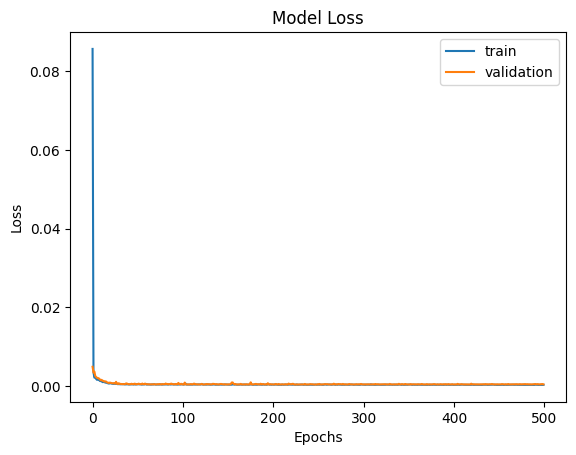

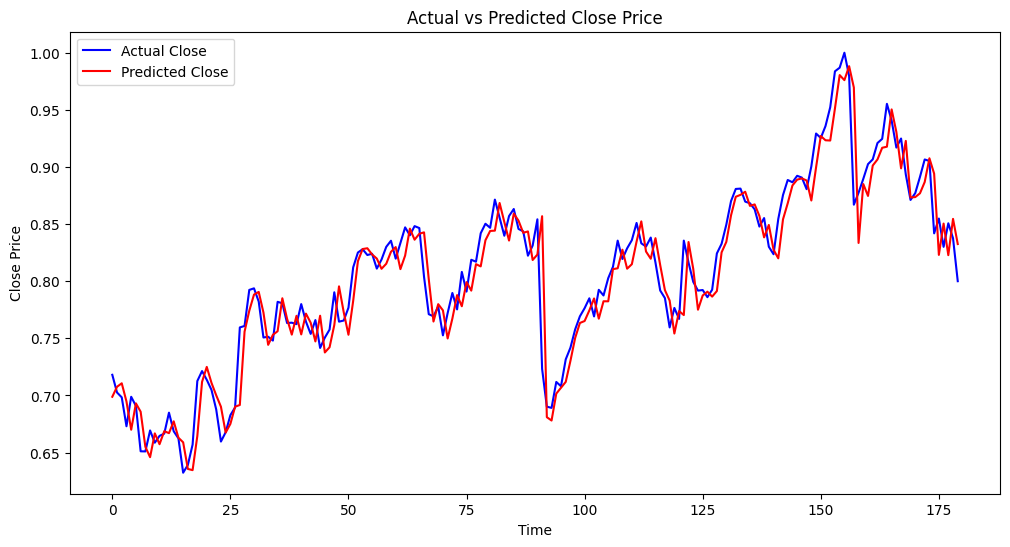

1/1 [==============================] - 0s 26ms/step
La valeur prédite de clôture pour le lendemain est : 136.62777709960938


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Téléchargement des données de Yahoo Finance
data = yf.download('GOOGL', start='2020-01-01', interval='1d')

# Sélection des colonnes Open, High, Low, Close
data = data[['Open', 'High', 'Low', 'Close']]

# Normalisation des données
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Fonction pour préparer les données pour le modèle LSTM
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i+n_steps)])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Nombre de pas temporels pour prédire le prochain point
n_steps = 30

# Préparation des données
X, y = prepare_data(data_scaled, n_steps)

# Séparation des données en ensembles d'entraînement et de test (80-20)
split = int(0.8 * len(data))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Construction du modèle LSTM
model = Sequential([
    LSTM(units=50, activation='relu', return_sequences=True, input_shape=(n_steps, 4)),
    LSTM(units=50, activation='relu', return_sequences=False),
    Dense(4)
])

# Compilation du modèle
model.compile(optimizer='adam', loss='mse')

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=500, batch_size=12, validation_split=0.2, verbose=1)

# Évaluation du modèle sur les données de test
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss}')

# Prédiction sur les données de test
predictions = model.predict(X_test)

# Affichage des résultats
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot des valeurs réelles et prédites
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 3], label='Actual Close', color='blue')
plt.plot(predictions[:, 3], label='Predicted Close', color='red')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Récupération de la valeur prédite de clôture du lendemain
last_sequence = X_test[-1]
last_sequence = last_sequence.reshape((1, n_steps, 4))
next_close = model.predict(last_sequence)
next_close = scaler.inverse_transform(next_close)
predicted_close = next_close[0][3]

print(f"La valeur prédite de clôture pour le lendemain est : {predicted_close}")

In [ ]:
import yfinance as yf

# Get the data
data = yf.download(tickers="MSFT", period="5d", interval="1m")

# Print only the close values
print(data['Close'].tail())

[*********************100%%**********************]  1 of 1 completed

Datetime
2024-03-07 09:30:00-05:00    405.260010
2024-03-07 09:31:00-05:00    404.665009
2024-03-07 09:32:00-05:00    404.254395
2024-03-07 09:33:00-05:00    403.165009
2024-03-07 09:34:00-05:00    403.290009
Name: Close, dtype: float64


In [ ]:
import yfinance as yf

# Get the data starting from a specific date
data = yf.download(tickers="MSFT", start="2024-03-04", interval="1m")

# Print only the close values
print(data['Close'])

[*********************100%%**********************]  1 of 1 completed

Datetime
2024-03-04 09:30:00-05:00    413.000000
2024-03-04 09:31:00-05:00    412.912994
2024-03-04 09:32:00-05:00    413.779999
2024-03-04 09:33:00-05:00    412.869995
2024-03-04 09:34:00-05:00    412.700012
                                ...    
2024-03-07 10:02:00-05:00    404.549988
2024-03-07 10:03:00-05:00    404.869995
2024-03-07 10:04:00-05:00    405.179993
2024-03-07 10:05:00-05:00    405.329987
2024-03-07 10:06:00-05:00    405.299988
Name: Close, Length: 1162, dtype: float64
